In [1]:
import astrawrap
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from copy import deepcopy
import ocelot as oc
from ocelot.adaptors.astra2ocelot import astraBeam2particleArray
from ocelot.gui.beam_plot import show_density, show_e_beam

import ARESlatticeStage3v1_9 as ares

initializing ocelot...


/Users/chenran/Workspace/Phd/Ocelot/ocelot/ocelot/gui/settings_plot.py:16: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  my_viridis.set_under('w')


### Loading lattice

__Note:__ here I changed the Astra particle distribution z position to 0.0 so that the tracking starts at 0.0m, otherwise I have to add 13.XX m to every element in the astra file

In [2]:
astra_binary = os.getenv("ASTRA", "Astra")
astra_config_path = Path("ares_ea1.in")

my_astra = astrawrap.Astra(Path(astra_binary), astra_config_path)

#my_astra.set_particle_dist_file(Path("ACHIP_EA1_2021.1351.001"))  ## Define particle distribution
#my_astra.project_name = "ares_ea_100k"
my_astra.set_particle_dist_file(Path("test_smallbeam.001")) ## with only 10k macroparticles, otherwise %%timeit is killing it
my_astra.project_name = "ares_ea_small"
my_astra.config['CHARGE']['lspch'] = False ## without space charge

# quads
my_astra.config['quadrupole']['q_k'] = [10.0,-9.0,-8.0]

# in ASTRA bend radius is used: rho = l / alpha , I guess the angle definition is other way around
bradius = [0.02 / -1e-3, 0.02 / 2e-3]
my_astra.config['dipole']['d_radius'] = bradius

## First test: 10k without space charge

In [3]:
%%timeit

my_astra.exec_astra(wait_for_subprocess=True)
#print("finished...")

23.9 s ± 950 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Astra to Ocelot: charge =  5.0000000000007985e-14  C
Astra to Ocelot: particles number =  10000
Astra to Ocelot: energy =  0.1073112166543752  GeV
Astra to Ocelot: s pos =  2.046  m


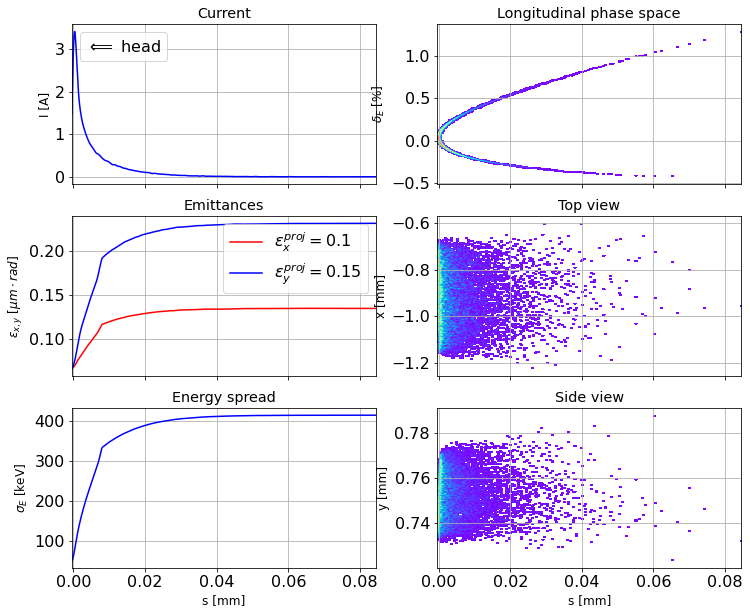

In [4]:
p_array_out = astraBeam2particleArray(f"{my_astra.project_name}.0205.001")
show_e_beam(p_array_out, figsize=(12,10))
plt.show()

## Second test: 10k with space charge

In [5]:
astra_binary = os.getenv("ASTRA", "Astra")
astra_config_path = Path("ares_ea1.in")

my_astra = astrawrap.Astra(Path(astra_binary), astra_config_path)

my_astra.set_particle_dist_file(Path("test_smallbeam.001")) ## with only 10k macroparticles, otherwise %%timeit is killing it
my_astra.project_name = "ares_ea_small_withSC"
my_astra.config['CHARGE']['lspch'] = True

# quads
my_astra.config['quadrupole']['q_k'] = [10.0,-9.0,-8.0]

# in ASTRA bend radius is used: rho = l / alpha , I guess the angle definition is other way around
bradius = [0.02 / -1e-3, 0.02 / 2e-3]
my_astra.config['dipole']['d_radius'] = bradius

In [6]:
%%timeit 
my_astra.exec_astra(wait_for_subprocess=True)

1min 9s ± 3.16 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Astra to Ocelot: charge =  5.0000000000007985e-14  C
Astra to Ocelot: particles number =  10000
Astra to Ocelot: energy =  0.1073112166543752  GeV
Astra to Ocelot: s pos =  2.046  m


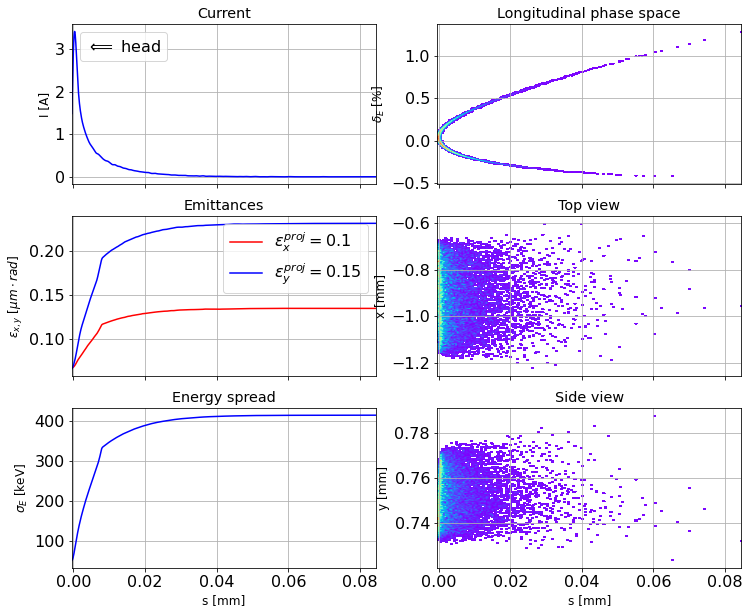

In [7]:
p_array_out = astraBeam2particleArray(f"{my_astra.project_name}.0205.001")
show_e_beam(p_array_out, figsize=(12,10))
plt.show()

## Try tracking with 100k macroparticles

In [8]:
astra_binary = os.getenv("ASTRA", "Astra")
astra_config_path = Path("ares_ea1.in")

my_astra = astrawrap.Astra(Path(astra_binary), astra_config_path)

my_astra.set_particle_dist_file(Path("ACHIP_EA1_2021.1351.001"))  ## Define particle distribution
my_astra.project_name = "ares_ea_100k"

my_astra.config['CHARGE']['lspch'] = False ## without space charge

# quads
my_astra.config['quadrupole']['q_k'] = [10.0,-9.0,-8.0]

# in ASTRA bend radius is used: rho = l / alpha
bradius = [0.02 / -1e-3, 0.02 / 2e-3]

my_astra.config['dipole']['d_radius'] = bradius

In [9]:
%%time 
my_astra.exec_astra(wait_for_subprocess=True)  # Probably not going to run multiple times

CPU times: user 7.57 ms, sys: 7.23 ms, total: 14.8 ms
Wall time: 3min 54s


<Popen: returncode: 0 args: ['/Users/chenran/Workspace/Phd/rl/cheetah/benchm...>

Astra to Ocelot: charge =  5.000000000001694e-13  C
Astra to Ocelot: particles number =  100000
Astra to Ocelot: energy =  0.1073112166543752  GeV
Astra to Ocelot: s pos =  2.046  m


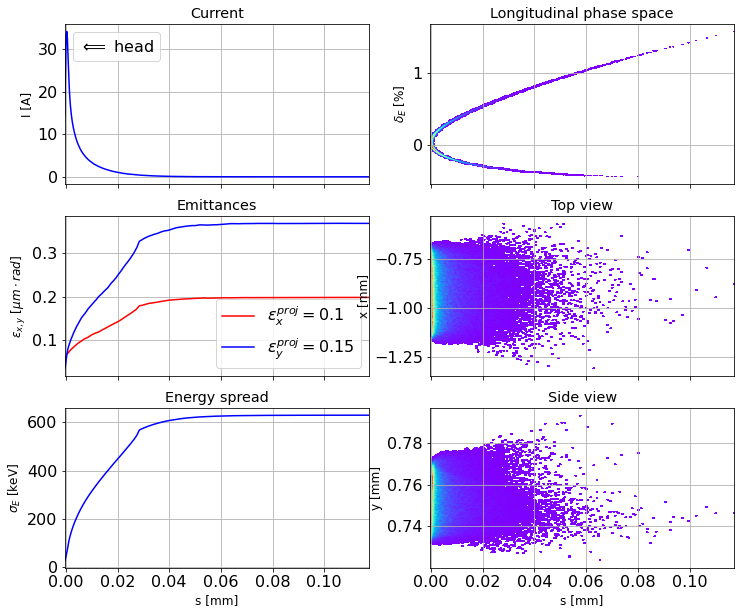

In [10]:
p_array_out = astraBeam2particleArray(f"{my_astra.project_name}.0205.001")
show_e_beam(p_array_out, figsize=(12,10))
plt.show()

## Tracking 100k and space charge

In [11]:
astra_binary = os.getenv("ASTRA", "Astra")
astra_config_path = Path("ares_ea1.in")

my_astra = astrawrap.Astra(Path(astra_binary), astra_config_path)

my_astra.set_particle_dist_file(Path("ACHIP_EA1_2021.1351.001"))  ## Define particle distribution
my_astra.project_name = "ares_ea_100k_withSC"

my_astra.config['CHARGE']['lspch'] = True ## without space charge

# quads
my_astra.config['quadrupole']['q_k'] = [10.0,-9.0,-8.0]

# in ASTRA bend radius is used: rho = l / alpha
bradius = [0.02 / -1e-3, 0.02 / 2e-3]

my_astra.config['dipole']['d_radius'] = bradius

In [12]:
%%time 
my_astra.exec_astra(wait_for_subprocess=True)  # Probably not going to run multiple times

CPU times: user 5.83 ms, sys: 6.41 ms, total: 12.2 ms
Wall time: 10min 9s


<Popen: returncode: 0 args: ['/Users/chenran/Workspace/Phd/rl/cheetah/benchm...>

Astra to Ocelot: charge =  5.000000000001694e-13  C
Astra to Ocelot: particles number =  100000
Astra to Ocelot: energy =  0.1073212165410095  GeV
Astra to Ocelot: s pos =  2.046  m


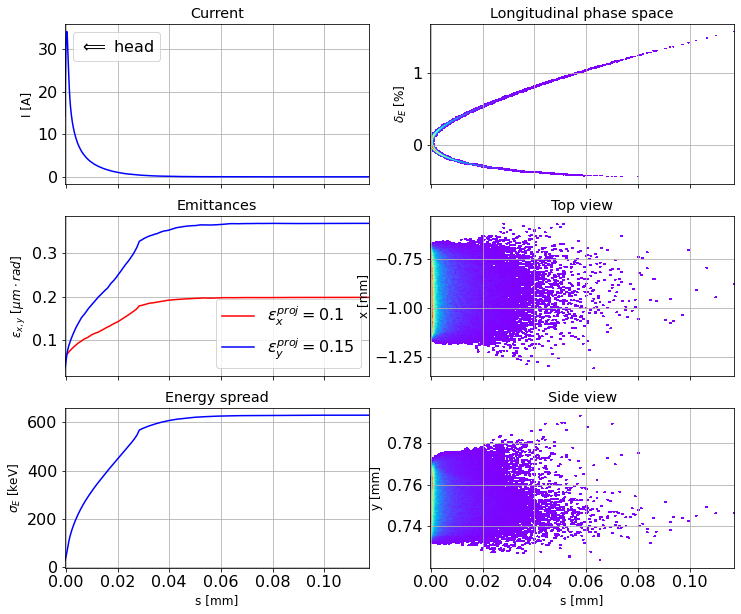

In [13]:
p_array_out = astraBeam2particleArray(f"{my_astra.project_name}.0205.001")
show_e_beam(p_array_out, figsize=(12,10))
plt.show()

---
## Try Ocelot on this computer

In [16]:
ares.areamqzm1.k1 = 10.0
ares.areamqzm2.k1 = -9.0
ares.areamcvm1.angle = 1e-3
ares.areamqzm3.k1 = -8.0
ares.areamchm1.angle = -2e-3

lattice = oc.MagneticLattice(ares.cell, start=ares.areasola1, stop=ares.areabscr1)
p_array = astraBeam2particleArray("ACHIP_EA1_2021.1351.001")  

Astra to Ocelot: charge =  5.000000000001694e-13  C
Astra to Ocelot: particles number =  100000
Astra to Ocelot: energy =  0.10731590244355117  GeV
Astra to Ocelot: s pos =  0.0  m


In [17]:
%%timeit
navi = oc.Navigator(lattice)
navi.unit_step = lattice.totalLen
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi, print_progress=False)

185 ms ± 5.12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
